# The Sparks Foundation TASK 1 : Prediction using Supervised ML

# Priyansu Panda

## In This Task, We will be predicting the percentage of an student based upon the number of hours they studied.
## For This we will be implemainting a simple Linear Regression model involving two variables.

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Plotting the data on 2D graph and try to manually find any relationship between the data

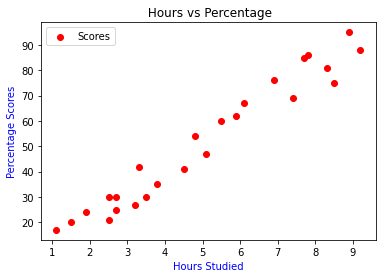

In [5]:
plt.figure(figsize=(6,4))
plt.title(" Hours vs Percentage")
plt.xlabel("Hours Studied",color="blue")
plt.ylabel("Percentage Scores",color="blue")
plt.scatter(data["Hours"],data["Scores"],color="red",label="Scores")
plt.legend(loc="best")
plt.show()

### From the above graph, we can conclude that there is linear relation between Percentage scores & Hours studied.

### We can calculate correlation using corr() method.

In [37]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


## Dividing the data into Feature and Target.

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

## Now we will split the data into Training and Test sets .
### For this we will be using Sckit-Learn's built-in train_test_split() method.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

## Training the Model

### After spliting the data, Now we will train our alogorithm

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print("Training Completed")

Training Completed


In [14]:
model.coef_

array([9.91065648])

In [15]:
model.intercept_

2.0181600414346974

### Now we can plot the Regression Line

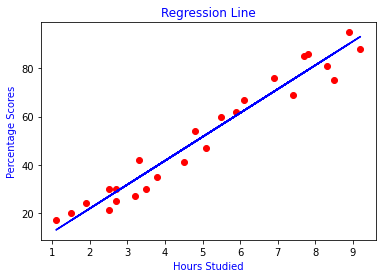

In [18]:
line = model.coef_*x+model.intercept_

plt.scatter(x,y,color="red")
plt.plot(x,line,color="blue")
plt.xlabel("Hours Studied",color="blue")
plt.ylabel("Percentage Scores",color="blue")
plt.title("Regression Line",color="blue")
plt.show()

## Predicting Scores

In [19]:
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Compairing the Actual vs Predicted Scores

In [39]:
df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Plotting the graph of Actual vs Predicted scores

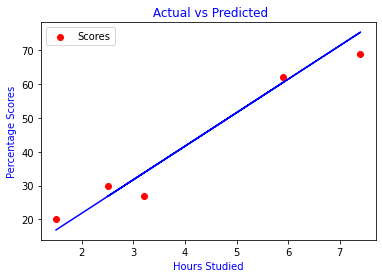

In [33]:
plt.figure(figsize=(6,4))
plt.title(" Actual vs Predicted",color="blue")
plt.xlabel("Hours Studied",color="blue")
plt.ylabel("Percentage Scores",color="blue")
plt.scatter(x_test,y_test,color="red",label="Scores")
plt.plot(x_test,y_pred,color="blue")
plt.legend(loc="best")
plt.show()

## Evaluating the Model

### We can use Mean Absolute Error or Root Mean Squared Error to evaluate the performance of the model

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute Error : ", mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  4.183859899002975
Root Mean Squared Error :  4.647447612100367


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [31]:
hours = [9.25]
result = model.predict([hours])
print("The predicted score of the student who studies for 9.25hrs/day will be {}".format(round(result[0],2)))

The predicted score of the student who studies for 9.25hrs/day will be 93.69


# Thank You !